## First Phase

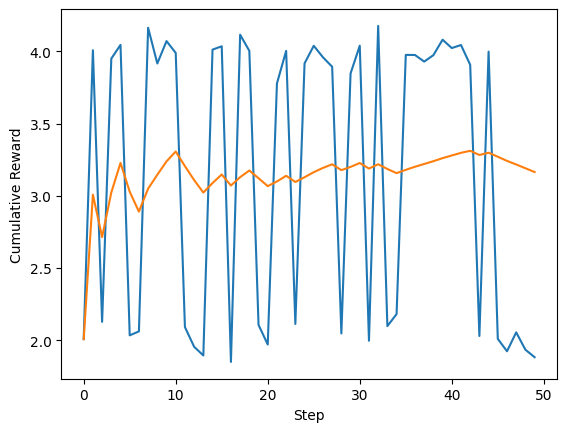

Final Q-Table:
[[2.93775295 1.9237405 ]
 [0.         0.        ]
 [0.         0.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Total number of States and Actions
nb_states = 3  # S0, S1, S2
nb_actions = 2  # Left, Right

# Initialize transition and reward matrices for the smaller state space
MDP_T = np.zeros((nb_states, nb_states, nb_actions))
MDP_R = np.zeros((nb_states, nb_actions))

# Define state transitions for S0
MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
MDP_T[0, 2, 0] = 0.3  # From S0 to S2 with Left action
MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
MDP_T[0, 1, 1] = 0.3  # From S0 to S1 with Right action

# Since from S1 and S2 we go back to S0 with probability 1, we only update those
MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
MDP_T[1, 0, 1] = 1.0  # From S1 to S0 with Right action
MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
MDP_T[2, 0, 1] = 1.0  # From S2 to S0 with Right action

# Initialize the Q-table
Q = np.zeros([nb_states, nb_actions])

# Learning parameters
alpha = 0.1
gamma = 0.9
epsilon = 0.9
epsilon_decay = 0.01
epsilon_final = 0.01

# Training parameters
nb_steps = 50

# Tracking variables for rewards
cumulative_rewards = []
average_rewards = []
# Train the agent for the specified number of steps
for step in range(nb_steps):
    state = 0  # Start at S0
    cum_reward = 0
    
    # Choose action using epsilon-greedy policy
    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
    else:
        action = np.argmax(Q[state])

    # Update epsilon with decay
    epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
    
    # Transition to new state based on action
    if action == 0:  # Left action
        new_state = np.random.choice([1, 2], p=[0.7, 0.3])
    else:  # Right action
        new_state = np.random.choice([1, 2], p=[0.3, 0.7])
    
    # Get reward from normal distribution centered at 4 for S1 and 2 for S2
    reward = np.random.normal(4 if new_state == 1 else 2, 0.1)
    
    # Update Q-table with Q-learning equation
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
    
    # Update cumulative reward
    cum_reward += reward
    cumulative_rewards.append(cum_reward)
    ave_reward = np.mean(cumulative_rewards)
    average_rewards.append(ave_reward)
    
    # Reset to S0 since in this MDP all actions lead back to S0
    state = 0

# Plotting the cumulative reward over steps
plt.plot(cumulative_rewards)
plt.plot(average_rewards)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.show()

# Display final Q-table
print('Final Q-Table:')
print(Q)


### Three Phases MB & MF

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Training parameters
nb_steps = 150

def run_simulation_mf(seed):
    # Tracking variables for rewards
    cumulative_rewards_mf = [0]
    step_rewards_mf = []
    average_sum_mf = []
    np.random.seed(seed)
    # Initialize the Q-table
    
    # Learning parameters
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    epsilon_decay = 0.01
    epsilon_final = 0.01
    # Total number of States and Actions
    nb_states = 3  # S0, S1, S2
    nb_actions = 2  # Left, Right
    
    # Initialize transition and reward matrices for the smaller state space
    MDP_T = np.zeros((nb_states, nb_states, nb_actions))
    MDP_R = np.zeros((nb_states, nb_actions))
    
    # Define state transitions for S0
    MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
    MDP_T[0, 2, 0] = 0.3  
    MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
    MDP_T[0, 1, 1] = 0.3  
    
    # Since from S1 and S2 we go back to S0 with probability 1, we only update those
    MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
    MDP_T[1, 0, 1] = 1.0  
    MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
    MDP_T[2, 0, 1] = 1.0  
    Q = np.zeros([nb_states, nb_actions])

    # Train the agent for the specified number of steps
    for step in range(nb_steps):
        state = 0  # Start at S0
        cum_reward = cumulative_rewards_mf[-1]  # Start with the last cumulative reward
        
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
        else:
            action = np.argmax(Q[state])
    
        # Update epsilon with decay
        epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
        
        # Phase 1 and 3 dynamics
        if step < 50 or step >= 100:
            # Transition to new state based on action
            if action == 0:  # Left action
                new_state = np.random.choice([1, 2], p=[0.7, 0.3])
            else:  # Right action
                new_state = np.random.choice([1, 2], p=[0.3, 0.7])
            
            # Get reward from normal distribution centered at 4 for S1 and 2 for S2 in phase 1
            # and centered at 1 for S1 in phase 3
            mean_reward = 4 if new_state == 1 else 2
            if step >= 100:
                mean_reward = 1 if new_state == 1 else mean_reward
            reward = np.random.normal(mean_reward, 0.1)
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
    
        # Phase 2 dynamics
        elif 50 <= step < 100:
            new_state = 1  # Always transition to S1
            reward = np.random.normal(1, 0.1)  # Reward for S1 is now normally distributed with mean 1
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        
        # Update cumulative reward
        cum_reward += reward
        step_rewards_mf.append(reward)
        cumulative_rewards_mf.append(cum_reward)
        average_sum_mf.append(np.mean(cumulative_rewards_mf))
        
        # Reset to S0 for next step if not in phase 2
        if step < 50 or step >= 100:
            state = 0
    return step_rewards_mf


In [16]:
import numpy as np
import matplotlib.pyplot as plt


def run_simulation_mb(seed):
    np.random.seed(seed)
        # Learning parameters
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    epsilon_decay = 0.01
    epsilon_final = 0.01
    # Tracking variables for rewards
    cumulative_rewards_mb = [0]
    step_rewards_mb = []
    average_sum_mb = []

    # Total number of States and Actions
    nb_states = 3  # S0, S1, S2
    nb_actions = 2  # Left, Right
    
    # Initialize transition and reward matrices for the smaller state space
    MDP_T = np.zeros((nb_states, nb_states, nb_actions))
    MDP_R = np.zeros((nb_states, nb_actions))
    
    # Define state transitions for S0
    MDP_T[0, 1, 0] = 0.7  # From S0 to S1 with Left action
    MDP_T[0, 2, 0] = 0.3  # From S0 to S2 with Left action
    MDP_T[0, 2, 1] = 0.7  # From S0 to S2 with Right action
    MDP_T[0, 1, 1] = 0.3  # From S0 to S1 with Right action
    
    # Since from S1 and S2 we go back to S0 with probability 1, we only update those
    MDP_T[1, 0, 0] = 1.0  # From S1 to S0 with Left action
    MDP_T[1, 0, 1] = 1.0  # From S1 to S0 with Right action
    MDP_T[2, 0, 0] = 1.0  # From S2 to S0 with Left action
    MDP_T[2, 0, 1] = 1.0  # From S2 to S0 with Right action

    Q2 = np.zeros([nb_states, nb_actions])
    # Train the agent for the specified number of steps
    for step in range(nb_steps):
        state = 0  # Start at S0
        cum_reward = cumulative_rewards_mb[-1]  # Start with the last cumulative reward
        
        # Choose action using epsilon-greedy policy--Without knowing about the transition probability
        # if np.random.rand() < epsilon:
        #     action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
        # else:
        #     if step < 50 or step >= 100:
        #         action = 0 if state == 0 else np.argmax(Q[state])  # Prefer Left in S0
        #     elif 50 <= step < 100:
        #         action = np.argmax(Q[state])  # In phase 2, the agent is stuck in S1, so it follows the Q-table
        if state == 0:
            # At S0, decide whether to go left or right based on transition probabilities
            if np.random.rand() < epsilon:
                # Exploration: choose a random action
                action = np.random.choice([0, 1])  # 0 is Left, 1 is Right
            else:
                # Exploitation: choose the action with the higher transition probability
                # If Q-value for going left is higher or equal to going right, choose left because it has a higher probability to go to S1
                # Otherwise, choose right because it has a higher probability to go to S2
                action = 0 if Q2[state, 0] >= Q2[state, 1] else 1
        else:
            # For S1 and S2, follow the Q-table to decide the action
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(Q2[state])

        # Update epsilon with decay
        epsilon = max(epsilon_final, epsilon * (1 - epsilon_decay))
        
        # Phase 1 and 3 dynamics
        if step < 50 or step >= 100:
            # Transition to new state based on action
            if action == 0:  # Left action
                new_state = 1
                # new_state = np.random.choice([1, 2], p=[0.7, 0.3])
            else:  # Right action
                new_state = 2
                # new_state = np.random.choice([1, 2], p=[0.3, 0.7])
            
            # Get reward from normal distribution centered at 4 for S1 and 2 for S2 in phase 1
            # and centered at 1 for S1 in phase 3
            mean_reward = 4 if new_state == 1 else 2
            if step >= 100:
                mean_reward = 1 if new_state == 1 else mean_reward
            reward = np.random.normal(mean_reward, 0.1)
            
            Q2[state, action] = Q2[state, action] + alpha * (reward + gamma * np.max(Q2[new_state]) - Q2[state, action])
        # Phase 2 dynamics
        elif 50 <= step < 100:
            new_state = 1  # Always transition to S1
            reward = np.random.normal(1, 0.1)  # Reward for S1 is now normally distributed with mean 1
            Q2[state, action] = Q2[state, action] + alpha * (reward + gamma * np.max(Q2[new_state]) - Q2[state, action])
        
        # Update cumulative reward
        cum_reward += reward
        step_rewards_mb.append(reward)
        cumulative_rewards_mb.append(cum_reward)
        average_sum_mb.append(np.mean(cumulative_rewards_mb))
        
        # Reset to S0 for next step if not in phase 2
        if step < 50 or step >= 100:
            state = 0
    
    return step_rewards_mb


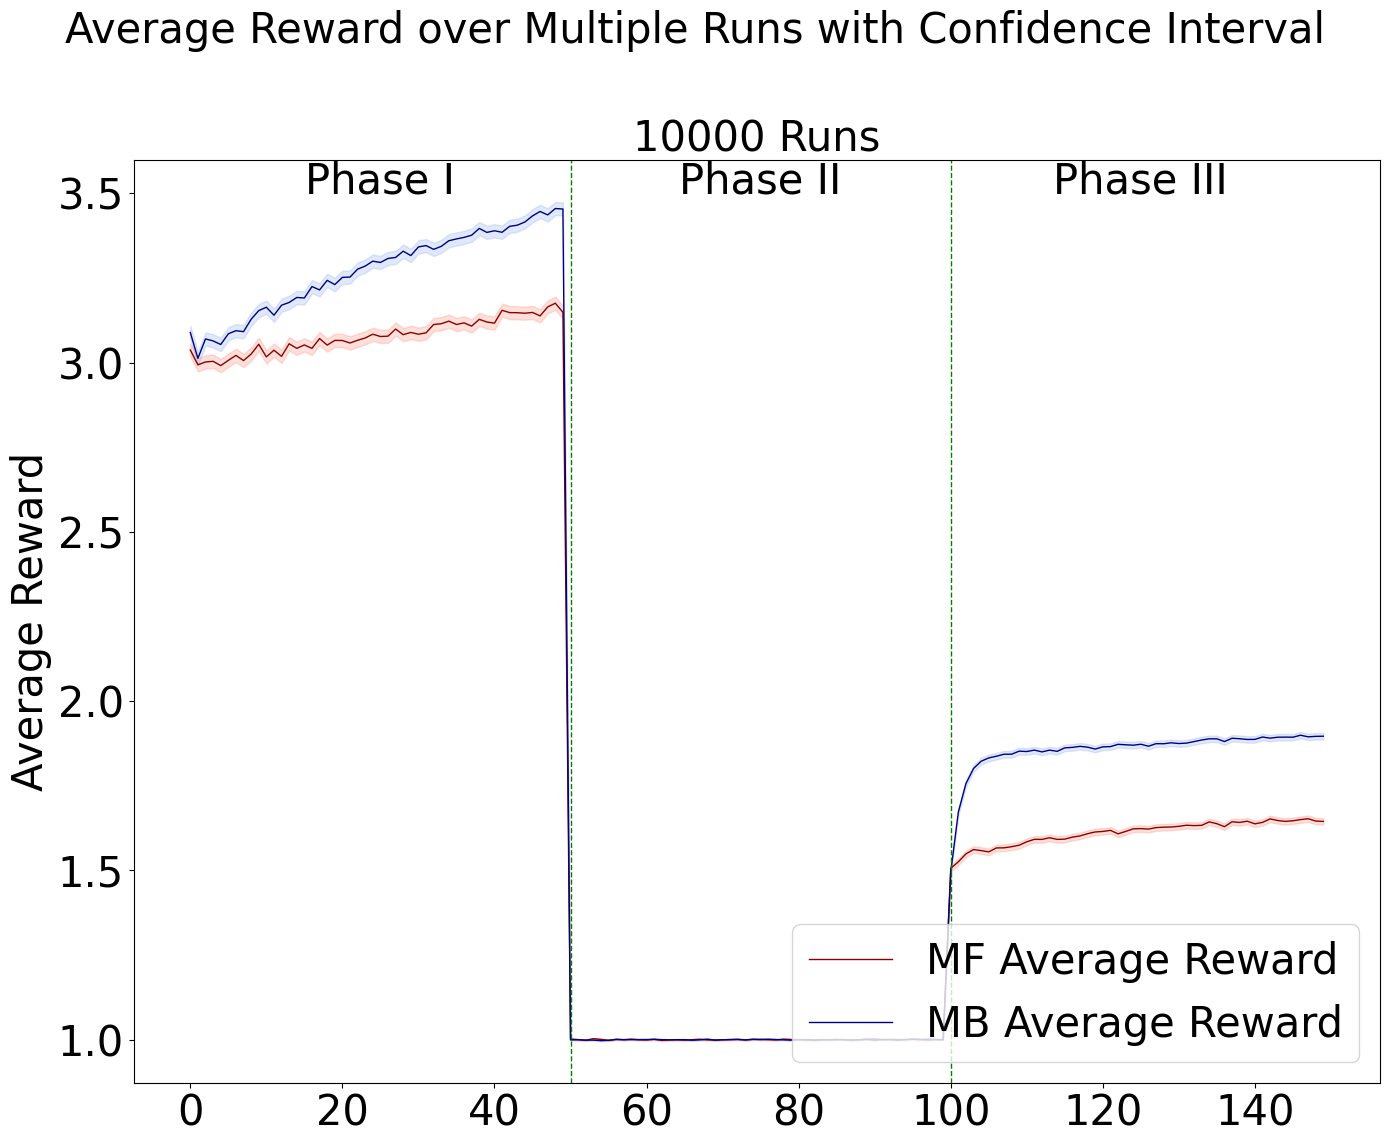

In [23]:
def generate_plot(num_runs, subplot_position):
    plt.subplot(1, 1, subplot_position)

    all_cumulative_rewards_mf = []
    all_cumulative_rewards_mb = []
    
    # Run simulations
    for i in range(num_runs):
        seed = i  
        cumulative_rewards_mf = run_simulation_mf(seed)
        cumulative_rewards_mb = run_simulation_mb(seed)
        all_cumulative_rewards_mf.append(cumulative_rewards_mf)
        all_cumulative_rewards_mb.append(cumulative_rewards_mb)
    
    # Calculate means and standard errors across runs
    mean_cumulative_rewards_mf = np.mean(all_cumulative_rewards_mf, axis=0)
    stderr_mf = np.std(all_cumulative_rewards_mf, axis=0)
    
    mean_cumulative_rewards_mb = np.mean(all_cumulative_rewards_mb, axis=0)
    stderr_mb = np.std(all_cumulative_rewards_mf, axis=0)
    
    h_mf = 1.96 * (stderr_mf/ np.sqrt(num_runs))
    h_mb = 1.96 * (stderr_mb/ np.sqrt(num_runs))
    
    x = range(len(mean_cumulative_rewards_mf))
    # Plotting the mean cumulative rewards with confidence intervals
    plt.plot(x,mean_cumulative_rewards_mf, '-', lw=1, label='MF Average Reward', color = 'darkred')
    plt.fill_between(x, mean_cumulative_rewards_mf - h_mf, mean_cumulative_rewards_mf + h_mf, alpha=0.2, color='tomato')
    
    plt.plot(x, mean_cumulative_rewards_mb, '-', lw=1, label='MB Average Reward', color = 'navy')
    plt.fill_between(x, mean_cumulative_rewards_mb - h_mb, mean_cumulative_rewards_mb + h_mb, alpha=0.2, color='cornflowerblue')
    # Adding vertical lines and phase labels
    plt.axvline(x=50, color='green', linestyle='--', lw=1)
    plt.axvline(x=100, color='green', linestyle='--', lw=1)
    plt.text(25, plt.ylim()[1], 'Phase I', horizontalalignment='center', verticalalignment='top', fontsize=30)
    plt.text(75, plt.ylim()[1], 'Phase II', horizontalalignment='center', verticalalignment='top', fontsize=30)
    plt.text(125, plt.ylim()[1], 'Phase III', horizontalalignment='center', verticalalignment='top', fontsize=30)

    # Adjusting labels and legend
    plt.ylabel('Average Reward', fontsize=30)
    plt.legend(loc='lower right', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

plt.figure(figsize=(14, 12))  # Adjusting the overall figure size


generate_plot(10000, 1)
plt.title('10000 Runs', fontsize=30)

# Adjusting layout and adding a common title
plt.suptitle('Average Reward over Multiple Runs with Confidence Interval', fontsize=30)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
filename = f"All_Runs.png"
plt.savefig(filename,dpi=500)
plt.show()